In [1]:
from PyBayesAB.distribution import bernoulli, poisson, normal
import numpy as np
import matplotlib.pyplot as plt


# Bernoulli 

In [2]:

# Create data type = Bernoulli object
Bern_test = bernoulli.BaysBernoulli()

# create data for two groups
p_A = 0.21
p_B = 0.2
for n in range(20):
    n_trial = np.random.randint(1,5)
    Bern_test.add_rand_experiment(n_trial, p_A, group="A")
    Bern_test.add_rand_experiment(n_trial, p_B, group="B")


In [5]:
# calculate some Bayesian metrics

ROPE = [-0.1, 0.1]  # Region of Practical Equivalence

print(Bern_test.summary_result(rope_interval=ROPE,level=95))

Probablity that A is better than B = 83.07% 
There is 95% that the difference in Bernoulli probability is between -0.08 and 0.22 
The MAP (maximum a posterior estimate) if 0.08 
Probability that the difference is within the ROPE (region of practical equivalence) is 62.4% 
ROPE-based decision: Inconclusive: needs more data (overlaps with ROPE)  
Bayeisian factor (A vs B vs null):
                For the null hypothesis: Parameter between -0.01 and 0.01
                For the alternative hypothesis: Parameter larger than 0 or smaller than 0
                The Bayes factor is 0.91, thus providing supports for the null hypothesis
                



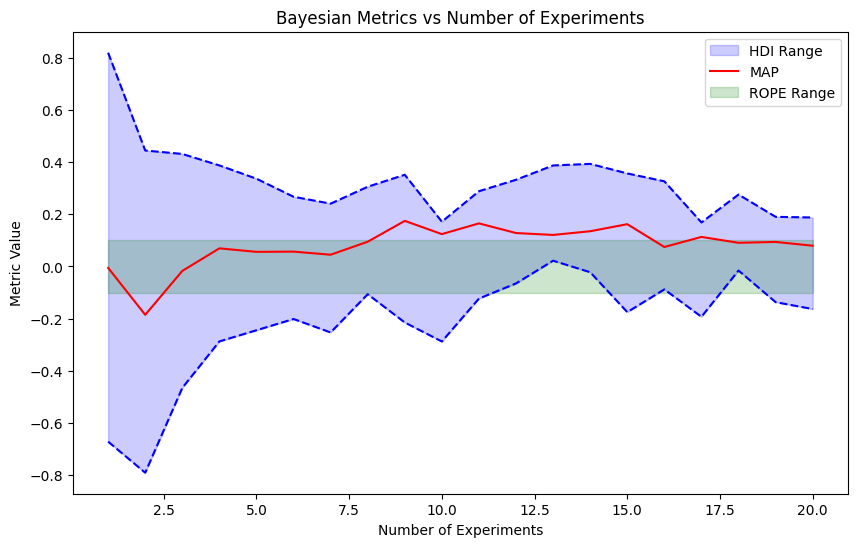

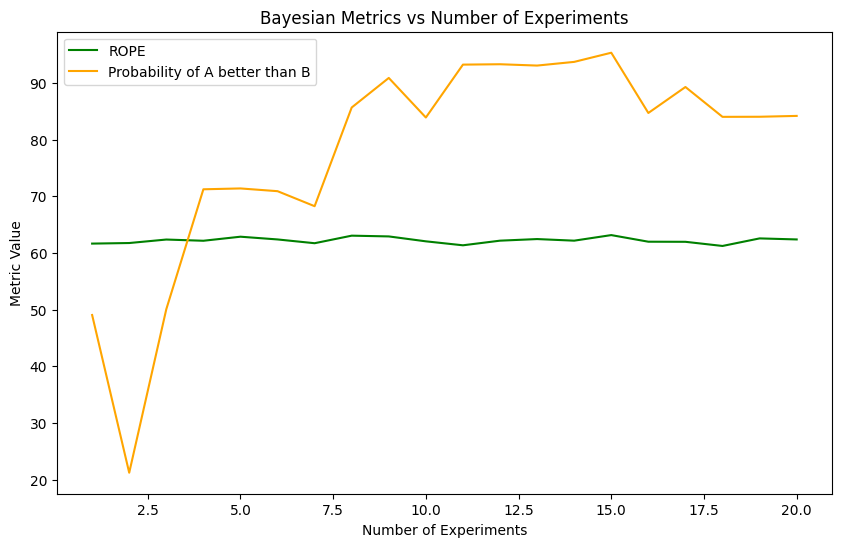

In [6]:
_, _ = Bern_test.plot_bayesian_metrics(rope_interval=ROPE)

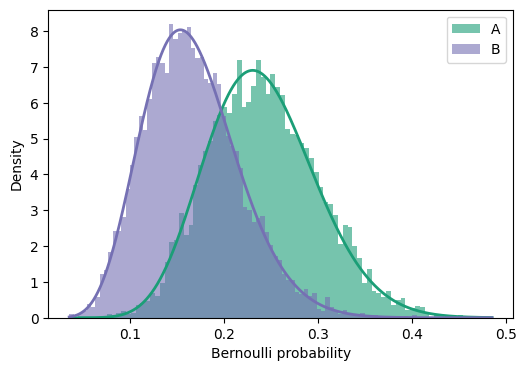

In [7]:
# plot posterior of the difference in p
Bern_test.plot_final_posterior(group="AB")

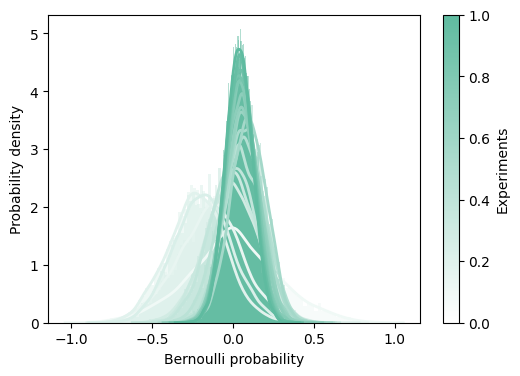

In [5]:
# plot cumulative (updated) posterior of the difference in p
Bern_test.plot_cum_posterior(group="diff", type="1D")

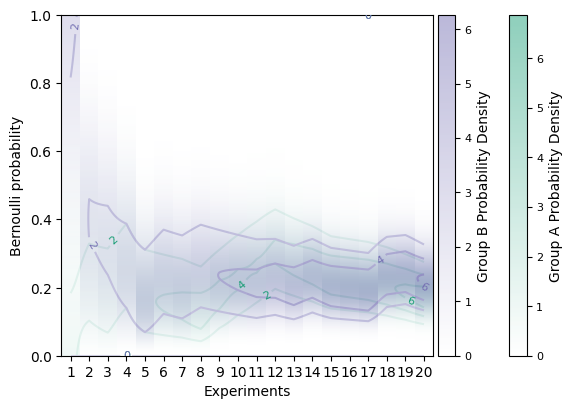

In [8]:
# Plot cumulative (updated) posterior for both groups as heatmap
Bern_test.plot_cum_posterior(group="AB", type="2D")

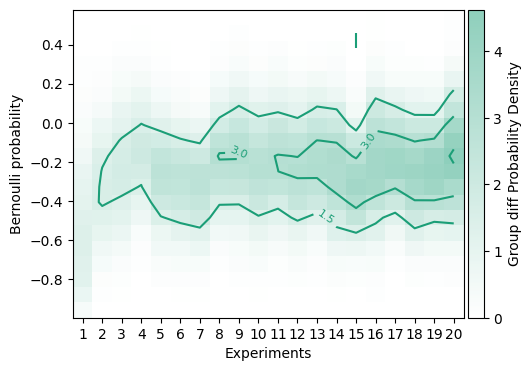

In [9]:
# Plot cumulative (updated) posterior for the difference as heatmap
Bern_test.plot_cum_posterior(group="diff", type="2D")

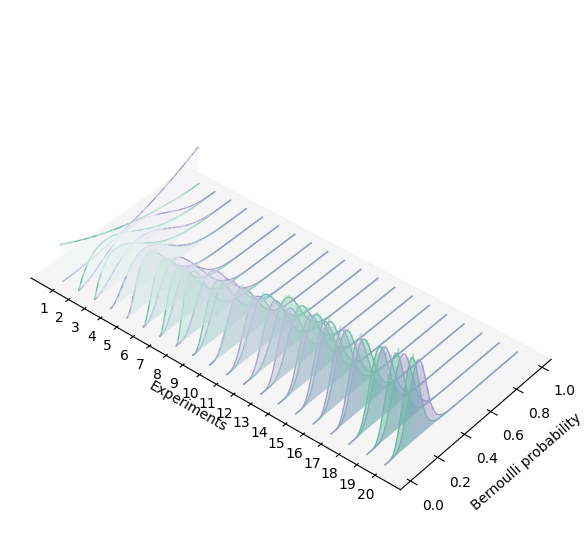

In [10]:
Bern_test.plot_cum_posterior(group="AB", type="3D")

In [11]:
# Plot animation for both groups
anim = Bern_test.plot_anim(group="AB")
anim

# Poisson

In [10]:
from PyBayesAB.distribution import poisson

# Create Likelihhod = Poisson object
Pois_test = poisson.BaysPoisson()

# create data
mu_A = 20
mu_B = 25
n_events = 20
Pois_test.add_rand_experiment(n_events, mu_A)
Pois_test.add_rand_experiment(n_events, mu_B, group="B")

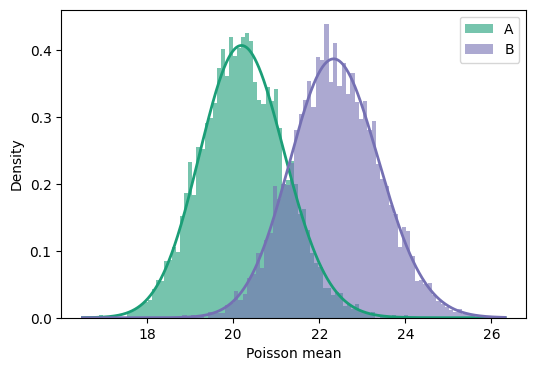

In [11]:
# Final posterior difference in Poisson mean
Pois_test.plot_final_posterior(group="AB")


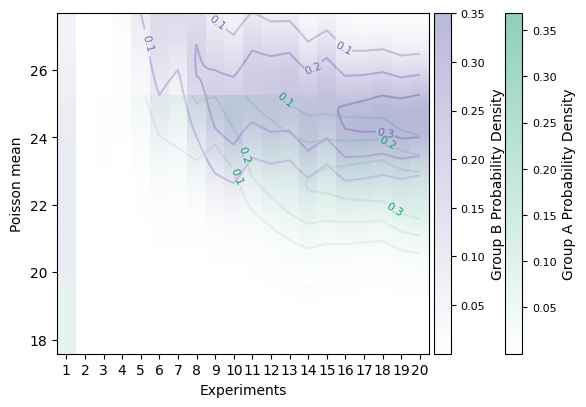

In [12]:
Pois_test.plot_cum_posterior(group="AB", type="2D")


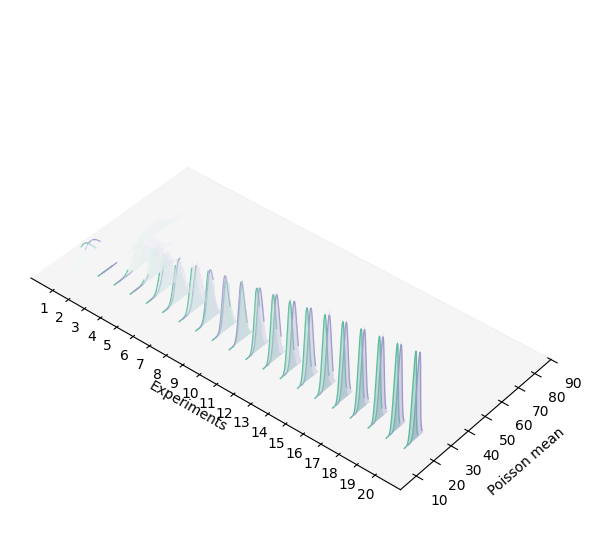

In [13]:
Pois_test.plot_cum_posterior(group="AB", type="3D")

In [14]:
# animation
anim = Pois_test.plot_anim(group="B")
anim

# Normal with known mean

In [15]:
from PyBayesAB.distribution import normal
import numpy as np

mean = 20
std_A = 10
tau_A = 1/std_A**2 
std_B = 12
tau_B = 1/std_B**2
normalknownmean = normal.BaysNormKnownMean(mean=mean)
n_exp = 20
for i in range(n_exp):
    n_data = np.random.randint(10,50)
    normalknownmean.add_rand_experiment(tau_A, n_data, group="A")
    normalknownmean.add_rand_experiment(tau_B, n_data, group="B")


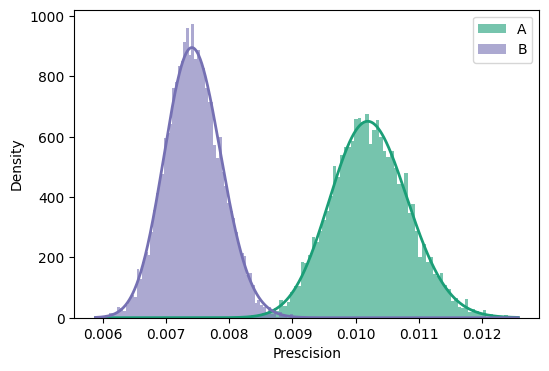

In [16]:
normalknownmean.plot_final_posterior(group="AB")

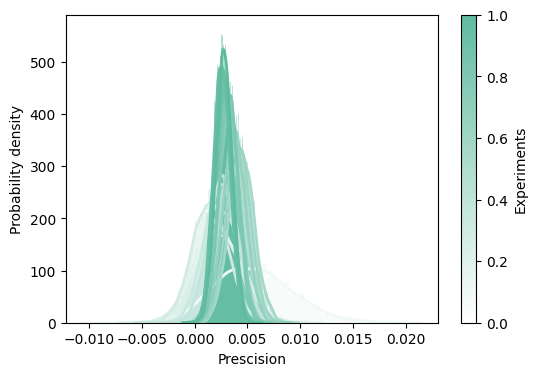

In [17]:
normalknownmean.plot_cum_posterior(group="diff", type="1D")

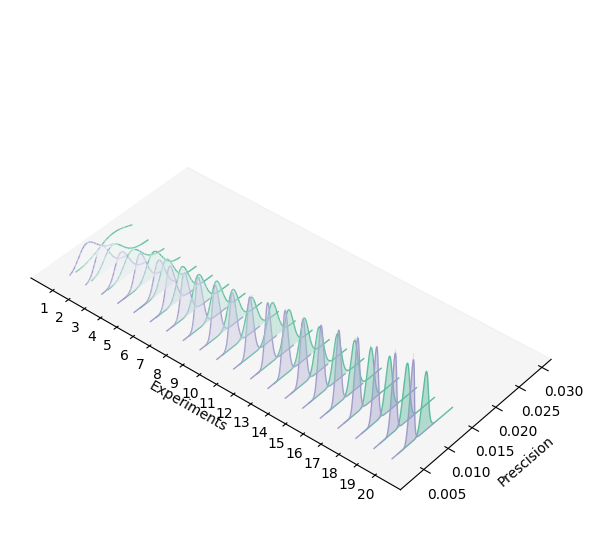

In [18]:
normalknownmean.plot_cum_posterior(group="AB", type="3D")

In [19]:
# animation
anim = normalknownmean.plot_anim(group="diff")
anim